<a href="https://colab.research.google.com/github/aaolcay/LMS-Adaptive-Filter/blob/main/Envelope_Detection_with_Hilbert_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Amplitude Envelope Detection using Hilbert Transform**

In this notebook, we will learn how to compute the amplitude envelope of a signal using the Hilbert transform. We will first discuss what the Hilbert transform is and why it is useful in computing the amplitude envelope. Then, we will walk through the code implementation of amplitude envelope detection using the Hilbert transform.

###**What is the Hilbert Transform?**

The Hilbert transform is a mathematical operation that takes a time-domain signal as input and produces a complex signal as output. The complex signal has the same frequency content as the original signal but its phase is shifted by 90 degrees. The Hilbert transform is a useful tool in signal processing because it can be used to compute the amplitude and instantaneous phase of a signal.

####**Why use Hilbert Transform for Amplitude Envelope Detection?**

The amplitude envelope of a signal is a smooth function that represents the strength of the signal over time. It is often used in applications such as speech processing and music analysis. The Hilbert transform can be used to compute the amplitude envelope of a signal because the absolute value of the complex signal produced by the Hilbert transform is proportional to the amplitude of the original signal.

###**Code Implementation**

We will use Python and the following libraries for our implementation:

* `numpy`: For numerical calculations

* `matplotlib`: For plotting

* `scipy.signal`: For performing the Hilbert transform

* `librosa`: For loading audio files

First, let's import the necessary libraries:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import librosa

Next, we will define a class for the envelope detection:

In [2]:
class EnvelopeDetection:
    def __init__(self, signal, sampling_rate, plot_envelope=True):
        # Constructor method that takes in a signal, its sampling rate, and a boolean flag to plot the envelope
        self.signal = signal  # Save the input signal to class attribute
        self.sampling_rate = sampling_rate  # Save the sampling rate to class attribute
        analytic_signal = self.perform_hilbert_transform()  # Perform Hilbert transform on signal
        amplitude_envelope = self.detect_envelope(analytic_signal)  # Compute amplitude envelope using analytic signal
        if plot_envelope:  # If plot_envelope flag is True, plot signal and its envelope
            plt.figure(figsize=(10,5))
            self.plot_envelope(amplitude_envelope)
        
    def perform_hilbert_transform(self):
        # Method that performs Hilbert transform on input signal
        analytic_signal = hilbert(self.signal)  # Apply Hilbert transform to signal
        return analytic_signal
    
    def detect_envelope(self, analytic_signal):
        # Method that computes the amplitude envelope of an analytic signal
        amplitude_envelope = np.abs(analytic_signal)  # Compute the absolute value of the analytic signal
        return amplitude_envelope
    
    def plot_envelope(self, amplitude_envelope):
        # Method that plots the original signal and its amplitude envelope
        time = np.arange(0, len(self.signal)) / self.sampling_rate  # Create time axis based on sampling rate and signal length
        plt.plot(time, self.signal, label='Signal')  # Plot the original signal
        plt.plot(time, amplitude_envelope, label='Envelope')  # Plot the amplitude envelope
        plt.xlabel('Time (s)')  # Set x-axis label
        plt.ylabel('Amplitude')  # Set y-axis label
        plt.legend()  # Add legend to plot
        plt.show()  # Show the plot

The `EnvelopeDetection` class takes in a signal, its sampling rate, and a flag to plot the envelope. The constructor method performs the Hilbert transform on the input signal, computes the amplitude envelope using the absolute value of analytical signal derived from Hilbert Transform that is applied by the function of `perform_hilbert_transform`, and plots the signal and its envelope if the `plot_envelope` flag is `True`.

Next, we will define a function that uses the `EnvelopeDetection` class to perform envelope detection on a signal:

In [3]:
def envelope_detection(x, fs, plot_envelope=True):
    # Function that performs envelope detection on input signal x with sampling rate fs
    ed = EnvelopeDetection(x, fs, plot_envelope)  # Create instance of EnvelopeDetection class
    analytic_signal = ed.perform_hilbert_transform()  # Perform Hilbert transform on signal
    return ed.detect_envelope(analytic_signal), x  # Return the computed envelope and the original signal

####**Test Data**

We generate a test signal. In this case, the code generates a sine wave that is amplitude-modulated with a second sine wave. You can customize the signal by changing the values of the `fs`, `duration`, `f1`, and `f2` variables. For example, if you want to increase the carrier frequency to 20 Hz, you can set `f1 = 20`. Here is the code to generate the test signal:

In [4]:
fs = 1000  # Set the sampling rate to 1000 Hz
duration = 1  # Set the signal duration to 1 second
f1 = 10  # Set the carrier signal frequency to 10 Hz
f2 = 2  # Set the modulating signal frequency to 2 Hz
t = np.arange(0, duration, 1/fs)  # Create time axis based on sampling rate and signal duration
x = np.sin(2*np.pi*f1*t) * (1 + 0.5*np.sin(2*np.pi*f2*t)) # Compute the amplitude-modulated test signal

To perform envelope detection on the test signal, we will use the `envelope_detection` function running `EnvelopeDetection` class. This class will compute the envelope of the signal by means of Hilbert Transform as explained above.

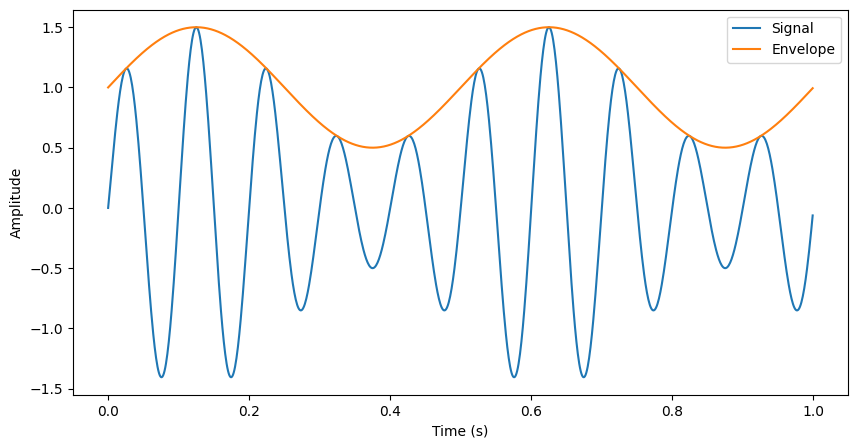

In [5]:
# Use EnvelopeDetection class to perform envelope detection
test_envelope, x = envelope_detection(x, fs, plot_envelope=True)  # Compute the envelope of the test signal and plot it

####**Speech Data**

Lastly, we will perform envelope detection on the audio signal and plot the result. We will use the same EnvelopeDetection class and `envelope_detection` function used with test data. But, first we have to authenticate our Drive account.

In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


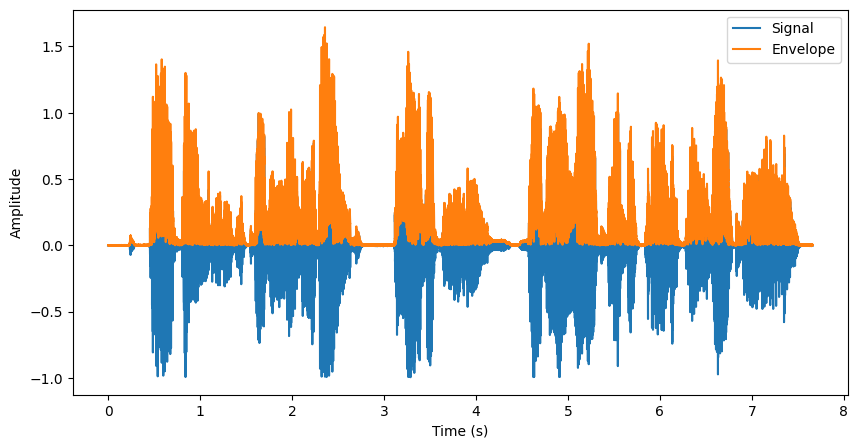

In [7]:
# Load an original audio signal
import librosa

# Load audio signal and sampling rate from file
speech, fs_speech = librosa.load('MyDrive/my_speech_example.wav', sr=44100)

# Set the duration of the audio signal in seconds
duration_speech = 5

# Generate time axis for the audio signal
t_speech = np.arange(0, duration_speech, 1/fs_speech)

# Perform envelope detection on the audio signal and plot the result
original_envelope, original = envelope_detection(speech, fs_speech, plot_envelope=True)

We do not share the `my_speech_example.wav` file, which a man recorded his own speech sound in English, because of the privacy. You can use any audio file accordingly. However, you need to be careful about the sampling rate and the directory of your file while loading it via `librosa`.

###**References**

Here are some references for further reading on amplitude envelope detection using Hilbert transform:

1. S. M. Kay, "Fundamentals of Statistical Signal Processing, Volume III: Practical Algorithm Development," Prentice Hall, 2013.
2. R. F. Ormondroyd, "Envelope Detection Using the Hilbert Transform," Proceedings of the IEEE, vol. 73, no. 9, pp. 1349-1350, 1985.
3. D. D. Lee and H. S. Seung, "Learning the Parts of Objects by Non-Negative Matrix Factorization," Nature, vol. 401, pp. 788-791, 1999.
4. Y. Huang, et al., "The Empirical Mode Decomposition and the Hilbert Spectrum for Nonlinear and Non-Stationary Time Series Analysis," Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences, vol. 454, no. 1971, pp. 903-995, 1998.
5. A. H. Sayed and T. Kailath, "A State-Space Approach to Adaptive RLS Filtering," IEEE Transactions on Signal Processing, vol. 44, no. 2, pp. 290-311, 1996.
6. P. White and J. D. Locke, "Performance of methods based on the fractional Fourier transform for the detection of linear frequency modulated signals," IET Signal Processing, vol. 5, no. 7, pp. 710-716, Nov. 2011.